# Simple OLS

## Import

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as ss

## Data Generation

In [2]:
# Data Generation
np.random.seed(42) # Fix Random
x = np.arange(1, 5, 0.1)
eps = np.random.randn(len(x))
y = 2 * x + 3 + eps

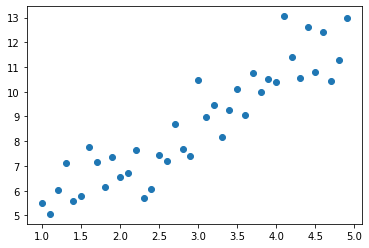

In [3]:
plt.scatter(x, y)

In [4]:
# Data to Matrix
X = np.matrix(x).T
X = sm.add_constant(X)
Y = np.matrix(y).T

In [5]:
X.shape

(40, 2)

In [6]:
Y.shape

(40, 1)

## Estimate Procedure

In [7]:
def find_beta_hat(X, Y):
    #return np.linalg.inv(X.T * X) * X.T * Y
    if np.linalg.det(X.T * X) == 0:
        print("Singular!")
    return np.linalg.pinv(X) * Y

In [8]:
beta = find_beta_hat(X, Y)

In [9]:
beta

matrix([[3.3835158 ],
        [1.79588046]])

In [10]:
def find_y_hat(X, beta):
    return X * beta

In [11]:
Y_hat = find_y_hat(X, beta)

In [12]:
Y_hat.shape

(40, 1)

In [13]:
y_hat = np.asarray(Y_hat).ravel()
y_hat

array([ 5.17939626,  5.35898431,  5.53857236,  5.7181604 ,  5.89774845,
        6.07733649,  6.25692454,  6.43651259,  6.61610063,  6.79568868,
        6.97527672,  7.15486477,  7.33445282,  7.51404086,  7.69362891,
        7.87321695,  8.052805  ,  8.23239305,  8.41198109,  8.59156914,
        8.77115718,  8.95074523,  9.13033328,  9.30992132,  9.48950937,
        9.66909742,  9.84868546, 10.02827351, 10.20786155, 10.3874496 ,
       10.56703765, 10.74662569, 10.92621374, 11.10580178, 11.28538983,
       11.46497788, 11.64456592, 11.82415397, 12.00374201, 12.18333006])

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

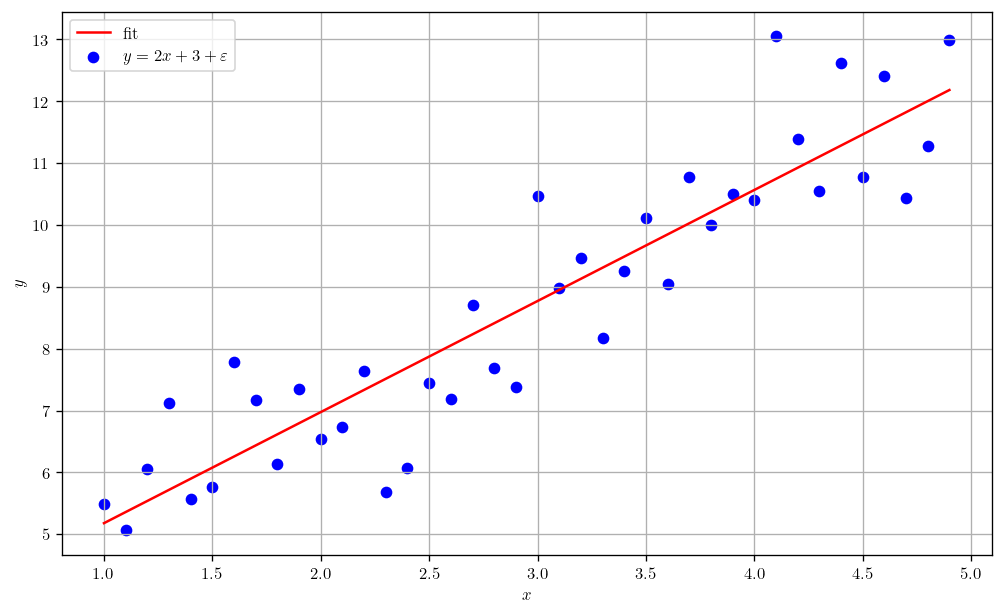

In [15]:
plt.figure(figsize=(10, 6), dpi=120)
plt.scatter(x, y, color='b', label=r"$y = 2x + 3 +\varepsilon$")
plt.plot(x, y_hat, color='r', label=r"fit")
plt.legend()
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

## t-test from scratch

In [16]:
# t-test
N = len(x)
p = 1

t_dist = ss.t(df=N-p-1) # Generate t-distribution with Degree of Freedom = N-p-1

In [17]:
sigma_hat = np.sum((y - y_hat)**2) / (N-p-1) # sigma^2

In [18]:
sigma_hat 

0.8732952665599736

In [19]:
v = np.diag(np.linalg.inv(X.T * X))

In [20]:
b = np.asarray(beta).ravel()

In [21]:
z = b / (np.sqrt(sigma_hat * v)) # t_score!

In [22]:
z

array([ 8.34435115, 14.03009064])

In [23]:
def calc_p_value(d, t):       # d: Distribution
    return (1 - d.cdf(t)) * 2 # cdf(t) = p(x < t)

In [24]:
calc_p_value(t_dist, z)

array([4.04864142e-10, 0.00000000e+00])

## t-test from statsmodels

In [25]:
model = sm.OLS(Y, X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.31e-16
Time:                        19:40:25   Log-Likelihood:                -53.022
No. Observations:                  40   AIC:                             110.0
Df Residuals:                      38   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3835      0.405      8.344      0.000       2.563       4.204
x1             1.7959      0.128     14.030      0.000       1.537       2.055
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.661
Skew:                           0.304   Prob(JB):                        0.719
Kurtosis:                       2.839   Cond. No.                         9.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y_hat = model.predict()

In [28]:
y_hat

array([ 5.17939626,  5.35898431,  5.53857236,  5.7181604 ,  5.89774845,
        6.07733649,  6.25692454,  6.43651259,  6.61610063,  6.79568868,
        6.97527672,  7.15486477,  7.33445282,  7.51404086,  7.69362891,
        7.87321695,  8.052805  ,  8.23239305,  8.41198109,  8.59156914,
        8.77115718,  8.95074523,  9.13033328,  9.30992132,  9.48950937,
        9.66909742,  9.84868546, 10.02827351, 10.20786155, 10.3874496 ,
       10.56703765, 10.74662569, 10.92621374, 11.10580178, 11.28538983,
       11.46497788, 11.64456592, 11.82415397, 12.00374201, 12.18333006])

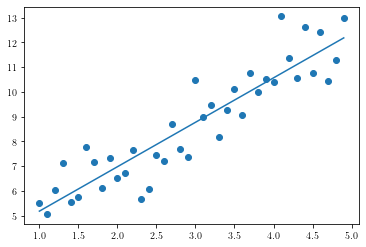

In [29]:
plt.scatter(x,y)
plt.plot(x, y_hat)